### Import the necessary packages

In [1]:
pwd

'/home/wsuser/work'

In [5]:
!pip install keras
!pip install tensorflow

     |████████████████████████████████| 1.3 MB 24.2 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps

### Load data

In [7]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### Data Analysis

In [8]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [9]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [10]:
y_train[0]

5

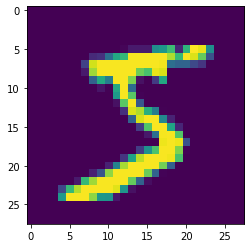

In [11]:
plt.imshow(X_train[0])

### Data Pre-Processing

In [12]:
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')

In [13]:
number_of_classes = 10
Y_train = np_utils.to_categorical(y_train, number_of_classes)
Y_test = np_utils.to_categorical(y_test, number_of_classes)

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Create model

In [15]:
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation="relu"))
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(Flatten())
model.add(Dense(number_of_classes, activation="softmax"))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer="Adam", metrics=["accuracy"])

### Train the model

In [17]:
model.fit(X_train, Y_train, batch_size=32, epochs=5, validation_data=(X_test,Y_test))

Epoch 1/5
1875/1875 [==============================] - 109s 58ms/step - loss: 0.2300 - accuracy: 0.9505 - val_loss: 0.1034 - val_accuracy: 0.9676
Epoch 2/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0685 - accuracy: 0.9789 - val_loss: 0.0926 - val_accuracy: 0.9723
Epoch 3/5
1875/1875 [==============================] - 104s 55ms/step - loss: 0.0486 - accuracy: 0.9848 - val_loss: 0.0873 - val_accuracy: 0.9752
Epoch 4/5
1875/1875 [==============================] - 106s 57ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0938 - val_accuracy: 0.9760
Epoch 5/5
1875/1875 [==============================] - 103s 55ms/step - loss: 0.0300 - accuracy: 0.9906 - val_loss: 0.0949 - val_accuracy: 0.9775


### Test the model

In [18]:
metrics = model.evaluate(X_test, Y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.09487372636795044, 0.9775000214576721]


In [19]:
prediction = model.predict(X_test[:4])
print(prediction)

[[2.65662995e-11 1.28511177e-17 1.49846871e-11 8.27167099e-08
  1.96840293e-16 1.21128896e-14 2.39848592e-19 9.99999881e-01
  2.87328564e-11 2.67269706e-10]
 [1.04235974e-10 6.20431138e-08 9.99999762e-01 9.14926024e-10
  2.03527164e-13 6.75636237e-14 1.08431024e-07 6.36499317e-14
  1.69471381e-10 7.35934465e-16]
 [3.48862517e-09 9.97231185e-01 1.13732734e-09 4.51022032e-12
  2.76441779e-03 7.51642233e-08 3.08058068e-09 2.31879937e-08
  4.30163573e-06 6.48913012e-09]
 [1.00000000e+00 3.32499413e-18 9.56359883e-13 2.33726257e-14
  4.18369266e-15 1.42538271e-12 1.83078802e-10 1.01013753e-14
  6.69727425e-12 3.69863407e-09]]


In [20]:
print(numpy.argmax(prediction, axis=1))
print(Y_test[:4])

NameError: name 'numpy' is not defined

### Save the model

In [21]:
model.save("model.h5")

In [22]:
!tar -zcvf HandwrittenDigitRecognitionSystem.tgz model.h5

model.h5


In [23]:
ls -1

HandwrittenDigitRecognitionSystem.tgz
model.h5


In [24]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 20.3 MB/s eta 0:00:01


In [25]:
from ibm_watson_machine_learning import APIClient

wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "b6ylVREp3gSWASEkD4q0-dNH4LUFNQ7ZYK3q7LEkvI89"
}

client = APIClient(wml_credentials)

In [26]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [27]:
space_uid = guid_from_space_name(client, 'HandwrittenDigitRecognitionSystem')
print("Space UID: ", space_uid)

Space UID:  eedd78d0-d9f0-4ade-a0c4-10b28c791e36


In [28]:
client.set.default_space(space_uid)

'SUCCESS'

In [29]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [30]:
software_spec_uid = client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [31]:
model_details = client.repository.store_model(model="HandwrittenDigitRecognitionSystem.tgz", meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid
})

model_id = client.repository.get_model_id(model_details)

In [32]:
model_id

'd404f2bf-b7ec-492d-8c87-b93270931ce0'

In [33]:
client.repository.download(model_id, "HandwrittenDigitRecognitionSystem.tar.gz")

Successfully saved model content to file: 'HandwrittenDigitRecognitionSystem.tar.gz'


'/home/wsuser/work/HandwrittenDigitRecognitionSystem.tar.gz'

### Test the saved model

In [38]:
from keras.models import load_model
from keras.preprocessing import image

In [39]:
model=load_model("model.h5")

In [41]:
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='ebO-OaEhO7wMY-9SBM5Rse5EKXzkaOUyerOqVmr2fhEd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'handwrittendigitrecognitionsystem-donotdelete-pr-mhh8m57c9lpkvy'
object_key = 'sample 1.png'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [44]:
img = Image.open(streaming_body_1).convert("L")
img = img.resize( (28,28) )

In [45]:
img

In [46]:
im2arr = np.array(img) 
im2arr = im2arr.reshape(1, 28, 28, 1) 

In [47]:
pred = model.predict(im2arr)
print(pred)

[[4.1148666e-04 3.8604143e-03 7.8578556e-01 4.6722221e-06 1.9103828e-01
  4.9510659e-06 5.9654622e-07 1.8818878e-02 5.1764371e-05 2.3481591e-05]]


In [48]:
print(np.argmax(pred, axis=1))

[2]
